## Assessment 1 

In [37]:
# These modules are required for this exercise.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import seaborn as sns
from sklearn.model_selection import KFold

#add random seed for numpy to make sure that the results are reproducable
np.random.seed(1)

### Import the data

In [38]:
# load data set
data_path = os.path.join(os.getcwd(),'Datasets','Task1_RegressionTask_CancerData.txt')

#data is seperated by tabs -> "\t"
df_cancer_data = pd.read_csv(data_path, sep="\t")

#remove the redundant index column 
df_cancer_data = df_cancer_data.drop("index", axis=1)

display(df_cancer_data)

,logCancerVol,logCancerWeight,age,logBenighHP,svi,logCP,gleasonScore,gleasonS45,levelCancerAntigen,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


In [39]:
#get an overview of some statistics about the data
display(df_cancer_data.describe())

#determine the size of the datasets and the number of attributes
print(f"Number of data points: {len(df_cancer_data)}")
print(f"Number of attributes: {len(df_cancer_data.iloc[0])-1}")

,logCancerVol,logCancerWeight,age,logBenighHP,svi,logCP,gleasonScore,gleasonS45,levelCancerAntigen
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


Number of data points: 97
Number of attributes: 9


#### Description
The cancer data contains 97 datapoints and each datapoint has 9 attributes, 8 of which are features that are going to be used to predict the level of cancer antigen ("levelCancerAntigen") that is given. The summarized table shows that the minimum level of cancer antigen given was -0.43, the maximum was 5.58 and the average level of cancer antigen given was 2.478.

C:\Users\bensa\anaconda3\envs\CS4049_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\bensa\anaconda3\envs\CS4049_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


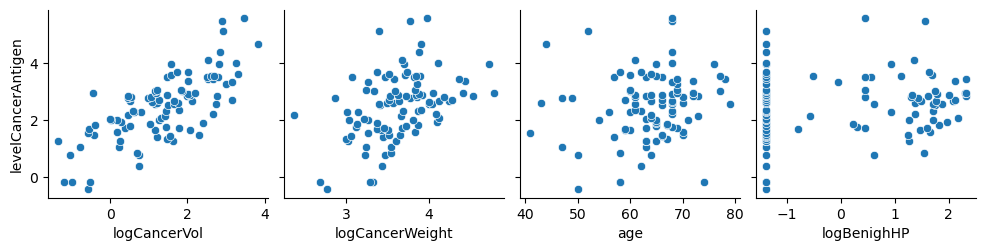

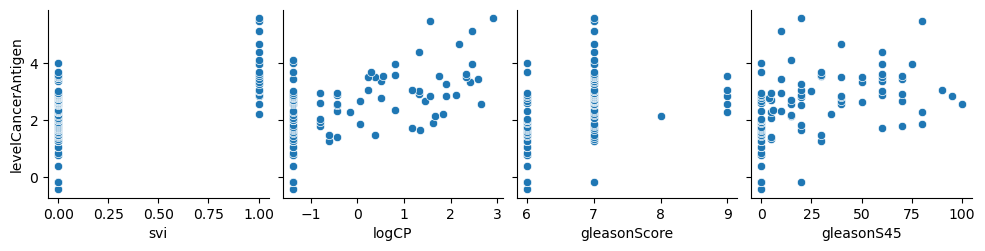

In [40]:
#get the column heading/name of each feature
columns_to_plot = [column for column in df_cancer_data.columns if column != "train" and column != "levelCancerAntigen"]

#create a pairplot of feature against levelCancerAntigen
sns.pairplot(df_cancer_data,  
            x_vars=columns_to_plot[:4],
            y_vars=["levelCancerAntigen"])
sns.pairplot(df_cancer_data,  
            x_vars=columns_to_plot[4:],
            y_vars=["levelCancerAntigen"])
#clear relationship between logCancerVol, logCancerWeight, logCP and levelCancerAntigen


### Data Preprocessing

#### Splitting Data into training and test set

In [41]:
#seperate data into training and testing dataframes
df_cancer_data_train = df_cancer_data[df_cancer_data["train"] == "T"].drop("train", axis=1)
df_cancer_data_test = df_cancer_data[df_cancer_data["train"] == "F"].drop("train", axis=1)

#create training data and convert all element into float64 values
X_train = df_cancer_data_train.drop("levelCancerAntigen", axis=1).to_numpy() 
X_train = X_train.astype(np.float64)

y_train = df_cancer_data_train["levelCancerAntigen"].to_numpy() 
y_train = y_train.astype(np.float64)

#create testing data
X_test = df_cancer_data_test.drop("levelCancerAntigen", axis=1).to_numpy() 
X_test = X_test.astype(np.float64)

y_test = df_cancer_data_test["levelCancerAntigen"].to_numpy() 
y_test = y_test.astype(np.float64)

print(f"X_train shape: {X_train.shape} y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape} y_test shape: {y_test.shape}")

X_train shape: (67, 8) y_train shape: (67,)
X_test shape: (30, 8) y_test shape: (30,)


#### Nomrmalize data
This is done because normalization can help the optimizatin algoirthm to converge more quickly, thereby speeding up training
and can make sure that outlier data does not disproportionalty affect the model, making it more robust to outliers.

In [43]:
#Normalize data using the Frobenius norm 
#calculate norm 
X_train_norm = np.linalg.norm(X_train, axis=0)
#apply norm to training data
X_train = X_train/X_train_norm
#apply same norm to test data 
X_test = X_test/X_train_norm

In [44]:
#To include the bias w0 we can simply add a column of 1.0 
#insert 1.0 as first column in train 
X_train = np.insert(X_train, 0, 1.0, axis=1)
#insert 1.0 as first column in test 
X_test = np.insert(X_test, 0, 1.0, axis=1)

### Algorithm Implementation

#### Least Square estimation (LSE) implemenation

In [8]:
def sum_squared_errors(w, X, y): 
    #calculate the predictions
    predictions = np.matmul(w, X.T)
    #calculate the squared error 
    square_error = np.square(y - predictions)
    #sum the squared error
    total_error = np.sum(square_error)
    return total_error


def compute_gradient(w, xi, yi): 
    #calculate the predictions 
    prediction = np.inner(w,xi)
    #calculate the error
    error = yi - prediction
    #compute the gradient
    gradient = -2.0*error*xi 
    return gradient 

def compute_full_gradient(w, X, y): 
    full_gradient = 0.0
    #calculate the gradient for every datapoint 
    for i, x in enumerate(X): 
        full_gradient = full_gradient + compute_gradient(w, x, y[i])
    
    #divide by the number of samples to get the average gradient over the dataset
    full_gradient = full_gradient/X.shape[0]
    return full_gradient


def LSE(X, y, w, num_epochs, learning_rate, testing=False): 
    #do gradient descent to find the optimal weights 
    
    #for testing 
    weights = []
    errors = []
    
    for epoch in range(num_epochs): 
        #compute gradient for each of the weights for this epoch
        gradient_epoch = compute_full_gradient(w, X, y)
        #update each of the weights 
        w = w - (learning_rate*gradient_epoch)
        
        if testing:
            #compute error for this epoch 
            error_epoch = sum_squared_errors(w, X, y)
            #append values 
            weights.append(w) 
            errors.append(error_epoch)
            #print to see progress
            if epoch % 100 == 0: 
                print(f"Epoch: {epoch} Sum Squared Error: {error_epoch}")
            
    if testing:   
        return w, weights, errors

    return w
    

#### Ridge Regression implementation

In [9]:
def ridge_cost_function(w, X, y, complexity_param): 
    #sum the squared error
    square_error_sum = sum_squared_errors(w=w, X=X, y=y)
    # Calculate the sum of squared weights excluding the first element (the bias)
    sum_of_squared_weights = np.sum(np.square(w[1:]))
    #calcualt the total error consisting of the squared error and the sum of the weights 
    total_error = square_error_sum + complexity_param*sum_of_squared_weights
    return total_error

def compute_ridge_gradient(w, xi, yi, complexity_param): 
    #calculate the predictions 
    prediction = np.inner(w,xi)
    #calculate the error
    error = yi - prediction
    #compute the gradient
    regression_gradient = -2.0*error*xi 
    
    #add the regularization
    #calculate regularization term 
    reg_term = 2*complexity_param*w
    #remove the bias from the reg_term
    reg_term[0] = 0 
    
    #compute the full gradient 
    gradient = regression_gradient + reg_term
    return gradient 


def compute_full_ridge_gradient(w, X, y, complexity_param):
    full_gradient = 0.0
    #calculate the gradient for every datapoint 
    for i, x in enumerate(X): 
        full_gradient = full_gradient + compute_ridge_gradient(w, x, y[i], complexity_param)
    
    #divide by the number of samples to get the average gradient over the dataset
    full_gradient = full_gradient/X.shape[0]
    return full_gradient

    
def ridge_regression(X, y, w, num_epochs, learning_rate, complexity_param, testing=False): 
    #do gradient descent to find the optimal weights 
    
    #for testing 
    weights = []
    errors = []
    
    for epoch in range(num_epochs): 
        #compute gradient for each of the weights for this epoch
        gradient_epoch = compute_full_ridge_gradient(w, X, y, complexity_param)
        #update each of the weights 
        w = w - (learning_rate*gradient_epoch)
        
        if testing: 
            #compute error for this epoch 
            error_epoch = sum_squared_errors(w, X, y)
            #append values 
            weights.append(w) 
            errors.append(error_epoch)
            #print to see progress
            if epoch % 100 == 0:
                error_ridge_epoch = ridge_cost_function(w, X, y, complexity_param)
                print(f"Epoch: {epoch} Ridge error: {error_ridge_epoch}")
    if testing:   
        return w, weights, errors

    return w

#### K-fold cross-validation to find the optimal complexity paramter

In [10]:
#k-fold cross-validation implementation 
def split_data_into_k_sets(data, k): 
    kf = KFold(n_splits=k, shuffle=True)
    #split the data 
    result = kf.split(data) 
    #create array of train, validation index sets
    result_indecies = [[res[0], res[1]] for res in result]
    return result_indecies


def find_optimal_complexity_parameter(X, y, num_folds, complexity_param_vals, 
                                      num_epochs, learning_rate, print_progress=False): 
    average_error_vals = []
    #split the data into num_folds folds 
    split_data_indecies = split_data_into_k_sets(data=X, k=num_folds)
    
    for complexity_param_val in complexity_param_vals:
        if print_progress: 
            print(f"Testing complexity_param_val = {complexity_param_val}")
            
        #for every fold (use each fold once as validation set)
        error_vals = []
        for training_set_indecies, validation_set_indecies in split_data_indecies: 
            #select the validation set
            X_validation = X_full[validation_set_indecies]
            y_validation = y_full[validation_set_indecies]

            #select the training set
            X_train = X_full[training_set_indecies]
            y_train = y_full[training_set_indecies]

            #train the model with the data
            w = np.random.rand(1,len(X_train[0]))[0]
            w = ridge_regression(X=X_train, y=y_train, w=w, 
                                num_epochs= num_epochs, learning_rate=learning_rate, 
                                 complexity_param = complexity_param_val, testing=False) 

            #calculate the error on the validation set 
            error = sum_squared_errors(w=w, X=X_validation, y=y_validation)

            #add the error to the error vals 
            error_vals.append(error)

        #calculate the average error for the value of complexit param 
        average_error_vals.append(sum(error_vals)/len(error_vals))
        
        if print_progress: 
            print(f"Average Error on validation set: {sum(error_vals)/len(error_vals)}\n")

    return average_error_vals



In [11]:
#get the full data that is normalized and has the additional column 
X_full = np.concatenate((X_train, X_test), axis = 0)
y_full = np.concatenate((y_train, y_test), axis = 0)

#define parameters 
num_folds = 5 #split the data into k=5 so (97/5 = 19 to 20 datapoint per set)
complexity_param_vals = [0, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]
num_epochs = 2000
learning_rate = 0.1

# find the avearage error for each complexity value
average_error_vals = find_optimal_complexity_parameter(X=X_full, y=y_full, num_folds=num_folds,
                                                       complexity_param_vals=complexity_param_vals, 
                                                       num_epochs=num_epochs, learning_rate=learning_rate,
                                                       print_progress=True)

Testing complexity_param_val = 0
Average Error on validation set: 11.044594495590994

Testing complexity_param_val = 1e-07
Average Error on validation set: 11.086596099911635

Testing complexity_param_val = 1e-06
Average Error on validation set: 11.063895885284516

Testing complexity_param_val = 1e-05
Average Error on validation set: 10.985016856268

Testing complexity_param_val = 0.0001
Average Error on validation set: 11.040773768840959

Testing complexity_param_val = 0.001
Average Error on validation set: 11.25827094200291

Testing complexity_param_val = 0.01
Average Error on validation set: 13.973605174767453

Testing complexity_param_val = 0.1
Average Error on validation set: 22.239675551423158

Testing complexity_param_val = 1.0
Average Error on validation set: 26.546254681486708



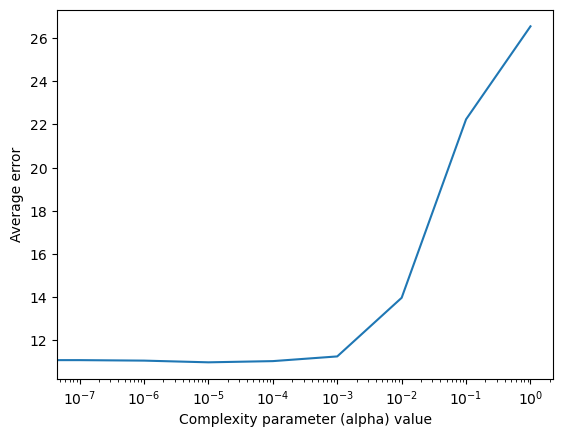

Optimal complexity_param: 1e-05, error: 10.985016856268


In [12]:
#plot result     
plt.plot(complexity_param_vals, average_error_vals)
plt.xlabel("Complexity parameter (alpha) value")
plt.ylabel("Average error")
plt.xscale('log')
plt.show()

#slect and print the complexity parameter value with the smallest average error
min_val_index = average_error_vals.index(min(average_error_vals))
print(f"Optimal complexity_param: {complexity_param_vals[min_val_index]}, error: {average_error_vals[min_val_index]}")

In [13]:
#define parameters 
num_folds = 5 #split the data into k=5 so (97/5 = 19 to 20 datapoint per set)

#define the range of complexity parameter values that should be tested
start = 1.0e-06
stop = 1.0e-04
step = 1.0e-06

complexity_param_vals = [start + step * i for i in range(int((stop - start) / step) + 1)]
num_epochs = 2000
learning_rate = 0.1

#find the avearage error for each complexity value
average_error_vals = find_optimal_complexity_parameter(X=X_full, y=y_full, num_folds=num_folds,
                                                       complexity_param_vals=complexity_param_vals, 
                                                       num_epochs=num_epochs, learning_rate=learning_rate,
                                                       print_progress=True)

Testing complexity_param_val = 1e-06
Average Error on validation set: 12.017437212358226

Testing complexity_param_val = 2e-06
Average Error on validation set: 12.109918225308814

Testing complexity_param_val = 3e-06
Average Error on validation set: 12.042244665497284

Testing complexity_param_val = 4e-06
Average Error on validation set: 12.067161874261554

Testing complexity_param_val = 4.9999999999999996e-06
Average Error on validation set: 12.07611596982886

Testing complexity_param_val = 5.999999999999999e-06
Average Error on validation set: 12.060586315830326

Testing complexity_param_val = 7e-06
Average Error on validation set: 12.06402471965166

Testing complexity_param_val = 8e-06
Average Error on validation set: 12.095969352479566

Testing complexity_param_val = 9e-06
Average Error on validation set: 12.104246574089068

Testing complexity_param_val = 1e-05
Average Error on validation set: 12.036178908902661

Testing complexity_param_val = 1.1e-05
Average Error on validation se

Average Error on validation set: 12.065446116248363

Testing complexity_param_val = 8.599999999999999e-05
Average Error on validation set: 12.050780521496256

Testing complexity_param_val = 8.699999999999999e-05
Average Error on validation set: 12.07661356700459

Testing complexity_param_val = 8.8e-05
Average Error on validation set: 12.049825248631446

Testing complexity_param_val = 8.9e-05
Average Error on validation set: 12.070182164733605

Testing complexity_param_val = 8.999999999999999e-05
Average Error on validation set: 12.059569922178337

Testing complexity_param_val = 9.099999999999999e-05
Average Error on validation set: 12.049682888824304

Testing complexity_param_val = 9.199999999999999e-05
Average Error on validation set: 12.034263468577757

Testing complexity_param_val = 9.3e-05
Average Error on validation set: 12.09497869756741

Testing complexity_param_val = 9.4e-05
Average Error on validation set: 12.018723369904947

Testing complexity_param_val = 9.499999999999999e-0

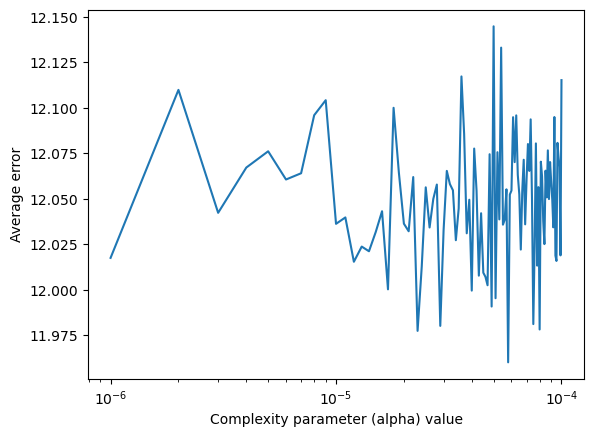

Optimal complexity_param (alpha): 5.7999999999999994e-05, error: 11.959950691173972


In [14]:
#plot result     
plt.plot(complexity_param_vals, average_error_vals)
plt.xlabel("Complexity parameter (alpha) value")
plt.ylabel("Average error")
plt.xscale('log')
plt.show()

#slect and print the complexity parameter value with the smallest average error
min_val_index = average_error_vals.index(min(average_error_vals))
print(f"Optimal complexity_param (alpha): {complexity_param_vals[min_val_index]}, error: {average_error_vals[min_val_index]}")

### Finding the best model  
Now k-fold cross-validation can be used to compare the performance of both models and select the model that has the lowest error and thus produces the best predictions

In [15]:
#set the paramters 
num_folds = 5 #split the data into k=5 so (97/5 = 19 to 20 datapoint per set)
num_epochs = 20000
learning_rate = 0.1
complexity_param = 5.8e-05 #3.5e-05 #optimal value found earlier

ridge_error_vals = []
LSE_error_vals = []


#split the data into num_folds folds 
split_data_indecies = split_data_into_k_sets(data=X_full, k=num_folds)

for training_set_indecies, validation_set_indecies in split_data_indecies: 
        #select the validation set
        X_validation = X_full[validation_set_indecies]
        y_validation = y_full[validation_set_indecies]

        #select the training set
        X_train = X_full[training_set_indecies]
        y_train = y_full[training_set_indecies]

        #train the ridge regression model 
        w = np.random.rand(1,len(X_train[0]))[0]
        w = ridge_regression(X=X_train, y=y_train, w=w, 
                             num_epochs= num_epochs, learning_rate=learning_rate, 
                             complexity_param = complexity_param, testing=False) 

        #calculate the ridge regression model error on the validation set 
        error = sum_squared_errors(w=w, X=X_validation, y=y_validation)
        ridge_error_vals.append(error) 
        print(f"Ridge Error on validation set: {error}")

        #train the LSE regression model 
        w = np.random.rand(1,len(X_train[0]))[0]
        w = LSE(X=X_train, y=y_train, w=w, num_epochs=num_epochs, 
                learning_rate=learning_rate, testing=False)

        #calculate the LSE regression model error on the validation set
        error = sum_squared_errors(w=w, X=X_validation, y=y_validation)
        LSE_error_vals.append(error)
        print(f"LSE Error on validation set: {error}\n")
        

Ridge Error on validation set: 14.040153266724968
LSE Error on validation set: 14.062881288523046

Ridge Error on validation set: 10.143430114435372
LSE Error on validation set: 10.224184987924003

Ridge Error on validation set: 8.466767880058079
LSE Error on validation set: 8.534202209021302

Ridge Error on validation set: 9.940825979385936
LSE Error on validation set: 9.879220001476646

Ridge Error on validation set: 10.726597323104029
LSE Error on validation set: 10.621893456985298



In [16]:
#compare errors
print(f"Ridge Average Error on validation set: {round(sum(ridge_error_vals)/len(ridge_error_vals), 3)}")
print(f"LSE Average Error on validation set: {round(sum(LSE_error_vals)/len(LSE_error_vals), 3)}")

Ridge Average Error on validation set: 10.664
LSE Average Error on validation set: 10.664
Ridge regression and LSE regression give the same error 


#### Training the final model 

In [47]:
#set the paramters 
num_epochs = 20000
learning_rate = 0.1

#train the LSE regression model 
w = np.random.rand(1,len(X_train[0]))[0]
w = LSE(X=X_train, y=y_train, w=w, num_epochs=num_epochs, 
                learning_rate=learning_rate, testing=False)

Epoch: 0 Sum Squared Error: 232.31696774136455
Epoch: 100 Sum Squared Error: 56.42939442991627
Epoch: 200 Sum Squared Error: 49.082590920200595
Epoch: 300 Sum Squared Error: 45.484465892165574
Epoch: 400 Sum Squared Error: 43.37167106803893
Epoch: 500 Sum Squared Error: 41.93162609115767
Epoch: 600 Sum Squared Error: 40.84371801447883
Epoch: 700 Sum Squared Error: 39.96651152012628
Epoch: 800 Sum Squared Error: 39.23006138446217
Epoch: 900 Sum Squared Error: 38.595952728830575
Epoch: 1000 Sum Squared Error: 38.04106471165333
Epoch: 1100 Sum Squared Error: 37.550325947024454
Epoch: 1200 Sum Squared Error: 37.11320219449874
Epoch: 1300 Sum Squared Error: 36.72187692249946
Epoch: 1400 Sum Squared Error: 36.370258908885006
Epoch: 1500 Sum Squared Error: 36.05341704346466
Epoch: 1600 Sum Squared Error: 35.76724490018854
Epoch: 1700 Sum Squared Error: 35.50825280777484
Epoch: 1800 Sum Squared Error: 35.27343267550925
Epoch: 1900 Sum Squared Error: 35.06016557521474
Epoch: 2000 Sum Squared Er

Epoch: 17100 Sum Squared Error: 30.984941887156904
Epoch: 17200 Sum Squared Error: 30.975658825822187
Epoch: 17300 Sum Squared Error: 30.966431999108348
Epoch: 17400 Sum Squared Error: 30.957261060344827
Epoch: 17500 Sum Squared Error: 30.948145665066928
Epoch: 17600 Sum Squared Error: 30.93908547099848
Epoch: 17700 Sum Squared Error: 30.930080138035226
Epoch: 17800 Sum Squared Error: 30.92112932822837
Epoch: 17900 Sum Squared Error: 30.91223270576852
Epoch: 18000 Sum Squared Error: 30.903389936970008
Epoch: 18100 Sum Squared Error: 30.89460069025544
Epoch: 18200 Sum Squared Error: 30.88586463614052
Epoch: 18300 Sum Squared Error: 30.87718144721923
Epoch: 18400 Sum Squared Error: 30.868550798149094
Epoch: 18500 Sum Squared Error: 30.859972365636832
Epoch: 18600 Sum Squared Error: 30.851445828424115
Epoch: 18700 Sum Squared Error: 30.842970867273536
Epoch: 18800 Sum Squared Error: 30.834547164954845
Epoch: 18900 Sum Squared Error: 30.82617440623123
Epoch: 19000 Sum Squared Error: 30.817

Text(0, 0.5, 'predicted levelCancerAntigen')

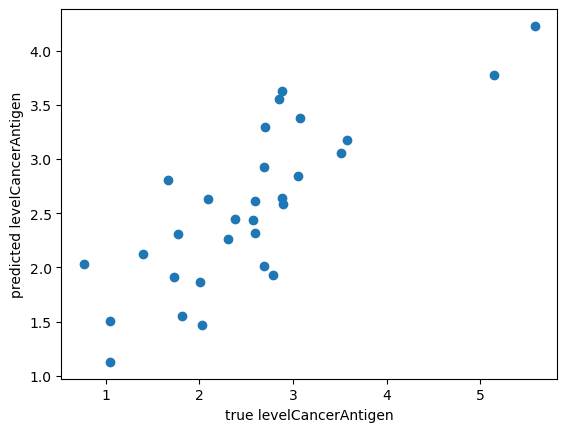

In [20]:
def predict_values(w, X): 
    predictions = np.matmul(w, X.T).flatten()
    return predictions

#create scatter plot between the predicted and true values for (Y) 
plt.scatter(y_test, predict_values(w, X_test))
plt.xlabel("true levelCancerAntigen")
plt.ylabel("predicted levelCancerAntigen")

In [21]:
#print final weights 
print(f"Final weights: {w}")

Final weights: [ 1.38571628  8.50751034  5.43366135 -4.71418257  1.13269227  2.97658499
 -0.5573184   0.25467471  0.2864848 ]
